In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("drive/My Drive/LPS")

In [3]:
os.listdir()

['labels.txt',
 'ececlassroom.jpg',
 'computerlab.jpg',
 'facultyroom.jpg',
 'appliedsciencelab.jpg',
 'Final_Data_LPSv3.csv',
 '0',
 '1',
 '2',
 '3']

In [0]:
os.chdir("..")

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import data
import os 
import cv2
from os import listdir
from os.path import isfile, join
from tensorflow.keras import layers
from sklearn.utils import shuffle
import keras as K
from keras.layers import Flatten, Dense, Input
from keras.models import Model
from keras.preprocessing import sequence, image

Using TensorFlow backend.


In [22]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                             
                             samplewise_center=True,
                             rescale=1. / 255,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             validation_split=0.3
                             
                             )


train_generator = datagen.flow_from_directory(
        'LPS',  # this is the target directory
        color_mode="rgb",
        target_size=(100, 100),  # all images will be resized to 150x150
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        seed=50,
        classes=['Applied_Lab','Computer_Lab','ECE_Classroom','Faculty_Room'],
        subset="training"
        
        )


validation_generator = datagen.flow_from_directory(
        'LPS',  # this is the target directory
        color_mode="rgb",
        target_size=(100, 100),  # all images will be resized to 150x150
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        seed=50,
        classes=['Applied_Lab','Computer_Lab','ECE_Classroom','Faculty_Room'],
        subset="validation"
        )

Found 1414 images belonging to 4 classes.
Found 606 images belonging to 4 classes.


In [28]:
import tensorflow as tf
import os
import keras
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from keras import backend as K
img_width, img_height = 100, 100


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()

#model.add(Conv2D(64, kernel_size=(3, 3),strides=(1),padding='same',input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


#model.add(Conv2D(32, (3, 3),strides=(1),padding='same'))
model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(16, (3, 3)))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Dense(8))
model.add(BatchNormalization())
model.add(Activation('relu'))          
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


filepath="weights_best.hdf5" # checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')


#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

model.compile(
          #optimizer=keras.optimizers.SGD(lr=0.001,momentum=0.9, nesterov=True),      
          optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['categorical_accuracy'])



model.summary(line_length=200)

Model: "sequential_7"
________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                                              Output Shape                                                                    Param #                       
conv2d_45 (Conv2D)                                                                        (None, 98, 98, 64)                                                              1792                          
________________________________________________________________________________________________________________________________________________________________________________________________________
conv2d_46 (Conv2D)                                                                        (None, 96, 96, 64)                                                              3692

In [29]:
final_model=model.fit_generator(train_generator,
                    steps_per_epoch=train_generator.samples //32,
                    validation_data = validation_generator,
                    validation_steps=validation_generator.samples // 32,
                    epochs=10,
                    verbose=1,
                    shuffle=True,
                    callbacks=[checkpoint])

model.save('weights_best1.hdf5')

Epoch 1/10
44/44 [==============================] - 162s 4s/step - loss: 1.4054 - categorical_accuracy: 0.4211 - val_loss: 1.3743 - val_categorical_accuracy: 0.4479

Epoch 00001: val_categorical_accuracy improved from -inf to 0.44792, saving model to weights_best.hdf5
Epoch 2/10
44/44 [==============================] - 157s 4s/step - loss: 1.0339 - categorical_accuracy: 0.5499 - val_loss: 1.0701 - val_categorical_accuracy: 0.6028

Epoch 00002: val_categorical_accuracy improved from 0.44792 to 0.60279, saving model to weights_best.hdf5
Epoch 3/10
44/44 [==============================] - 157s 4s/step - loss: 0.9220 - categorical_accuracy: 0.6085 - val_loss: 0.9955 - val_categorical_accuracy: 0.7387

Epoch 00003: val_categorical_accuracy improved from 0.60279 to 0.73868, saving model to weights_best.hdf5
Epoch 4/10
44/44 [==============================] - 158s 4s/step - loss: 0.8029 - categorical_accuracy: 0.7078 - val_loss: 1.1915 - val_categorical_accuracy: 0.4059

Epoch 00004: val_cate

[3]
[[0.16758007 0.19611415 0.29741567 0.33889008]]
------------------------------------------------------------------


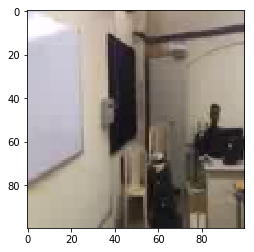

In [33]:
from keras.models import load_model
#model =load_model('drive/My Drive/final_try3')
model =load_model('weights_best1.hdf5')


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
"""
'computerlab.jpg'
'facultyroom.jpg'
'appliedsciencelab.jpg'
 """
img = cv2.imread('LPS/computerlab.jpg')
img=cv2.cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(100,100))
img = np.reshape(img,[100,100,3])
img = img/255.
classes=model.predict_classes(np.expand_dims(img, axis=0))
print (classes)
classes=model.predict(np.expand_dims(img, axis=0))
#train_generator.class_indices
print (classes)
print ("------------------------------------------------------------------")
plt.imshow(img)